In [97]:
from openai import OpenAI
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
import json

config_json = json.load(open('config.json'))

client = OpenAI(
    api_key=config_json['openai_key']
)

model='text-embedding-ada-002'

def embedded(word):
    return np.array(client.embeddings.create(input=word, model=model).data[0].embedding).reshape(1, -1)

In [100]:
# for testing
def similar(w1, w2):
    return cosine_similarity(embedded(w1), embedded(w2))

# print(similar('marvel', 'dc'))
# print(similar('marvel', 'mcu'))
# print(similar('marvel', 'bro'))
print(similar('ipad', 'kid'))
print(similar('ipad', 'adult'))
print(similar('ipad', 'teen'))

[[0.79859923]]
[[0.77779098]]
[[0.78217289]]


In [103]:
df = pd.read_csv('ocrd.csv')
 
# print(df.head(4))
label = df['post_name']
data = df# .drop("post_name", axis=1)


# arr = np.asarray([ embedded(i)[0] for i in ['cats', 'dogs', 'memes']]) # data.values.tolist() ])


In [104]:
def combine(row):
    return str(row['caption']) + '\n' + str(row['text'])

# test = data.head()
# test['embedded'] = test.apply(combine, axis=1)

# test = data.head()
data['embedded'] = data.apply(combine, axis=1)

# arr = np.asarray([ embedded(i)[0] for i in data['embedded'] ])
pd.DataFrame(data).to_csv('hand-edit.csv')

In [82]:
pd.DataFrame(arr).to_csv('embedded.csv')

In [83]:
from sklearn.preprocessing import StandardScaler
 
embedded = pd.read_csv('embedded.csv')

label = embedded['Unnamed: 0']
data = embedded.drop("Unnamed: 0", axis=1)

standardized_data = StandardScaler().fit_transform(data)
print(standardized_data.shape)

(430, 1536)


In [101]:
import random
from functools import partial

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import hdbscan
import umap
import tensorflow as tf
import tensorflow_hub as hub
from sentence_transformers import SentenceTransformer
from sklearn.metrics.cluster import normalized_mutual_info_score
from sklearn.metrics.cluster import adjusted_rand_score
from tqdm.notebook import trange
from hyperopt import fmin, tpe, hp, STATUS_OK, space_eval, Trials

pd.set_option("display.max_rows", 600)
pd.set_option("display.max_columns", 500)
pd.set_option("max_colwidth", 400)

ModuleNotFoundError: No module named 'hdbscan'

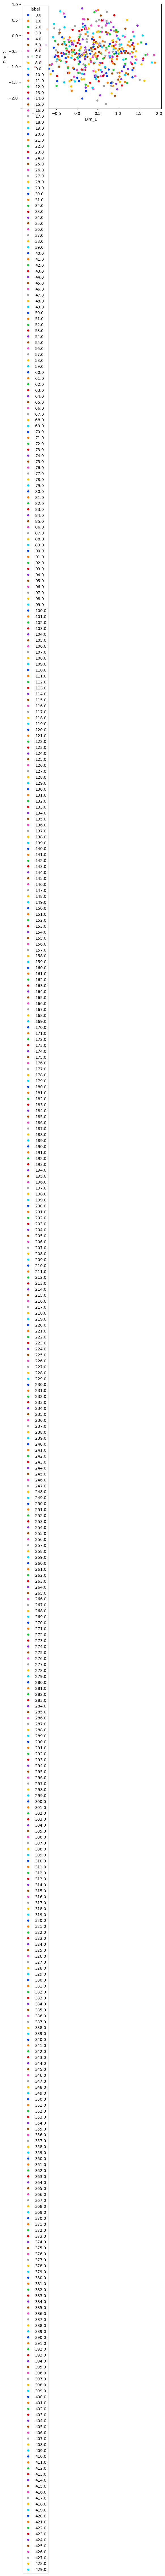

In [94]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

data_1000 = standardized_data[0:1000, :]
labels_1000 = label[0:1000]
 
model = TSNE(n_components = 3, random_state = 1, perplexity=300)
 
tsne_data = model.fit_transform(data_1000)
tsne_data = np.vstack((tsne_data.T, labels_1000)).T
tsne_df = pd.DataFrame(data = tsne_data,
     columns =("Dim_1", "Dim_2", "Dim_3", "label"))

import seaborn as sn
sn.scatterplot(data=tsne_df, x='Dim_1', y='Dim_2',
               hue='label', palette="bright")
plt.show()